In [13]:
#Importing the Libraries

import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets

In [14]:
# Loading the dataset
dataset = pd.read_csv("C:/Users/Setia Comp/Documents/MAchine Learning/Assignment 1/Iris.csv");
dataset.head(5)
dataset.shape

(150, 5)

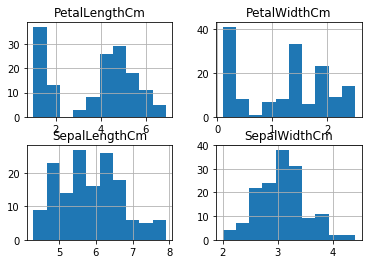

In [15]:
dataset.hist()
plt.show()

In [24]:
# Splitting the dataset into the Training set and Test set and converting into array.
array=dataset.values
array
x = array[:,0:4]
Y = array[:,4]
validation_size=0.30
seed=11
X_train, X_tst, Y_train, Y_tst= model_selection.train_test_split(x, Y, test_size=validation_size, random_state=seed)

In [29]:
# Building models
seed = 11
scoring = 'accuracy'
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LDA: 0.980909 (0.038236)
NB: 0.961818 (0.046851)


In [30]:
# Making Test data predictions
NB = GaussianNB()
NB.fit(X_train, Y_train)
predict = NB.predict(X_tst)
print(accuracy_score(Y_tst, predict))
print(confusion_matrix(Y_tst, predict))
print(classification_report(Y_tst, predict))

#LDA
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
predict1 = LDA.predict(X_tst)
print(accuracy_score(Y_tst, predict1))
print(confusion_matrix(Y_tst, predict1))
print(classification_report(Y_tst, predict1))

0.866666666667
[[14  0  0]
 [ 0 10  4]
 [ 0  2 15]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.83      0.71      0.77        14
 Iris-virginica       0.79      0.88      0.83        17

    avg / total       0.87      0.87      0.87        45

0.955555555556
[[14  0  0]
 [ 0 13  1]
 [ 0  1 16]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.93      0.93      0.93        14
 Iris-virginica       0.94      0.94      0.94        17

    avg / total       0.96      0.96      0.96        45



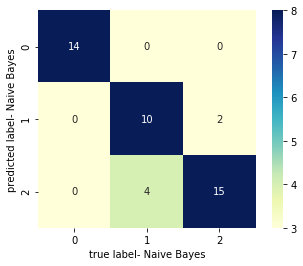

In [31]:
# Visualising the test result with Naive Bayes
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
mat = confusion_matrix(Y_tst, predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",vmin=3,vmax=8)
plt.xlabel('true label- Naive Bayes')
plt.ylabel('predicted label- Naive Bayes')
plt.show()

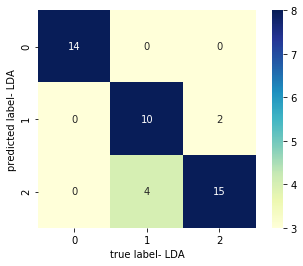

In [32]:
# Visualising the test result with LDA

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
mat = confusion_matrix(Y_tst, predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",vmin=3,vmax=8)
plt.xlabel('true label- LDA')
plt.ylabel('predicted label- LDA')
plt.show()

In [ ]:
# As we can see from the above graph that model accuracy of LDA is greater the NB.